In [91]:
import torch
import torch.nn.functional as F

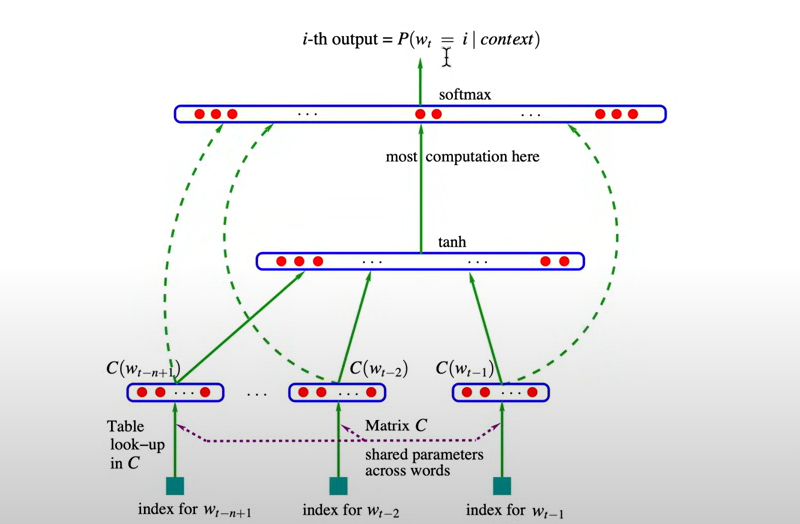

In [92]:
words = open('names.txt', 'r').read().splitlines()
words[:8], len(words)

(['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia'],
 32033)

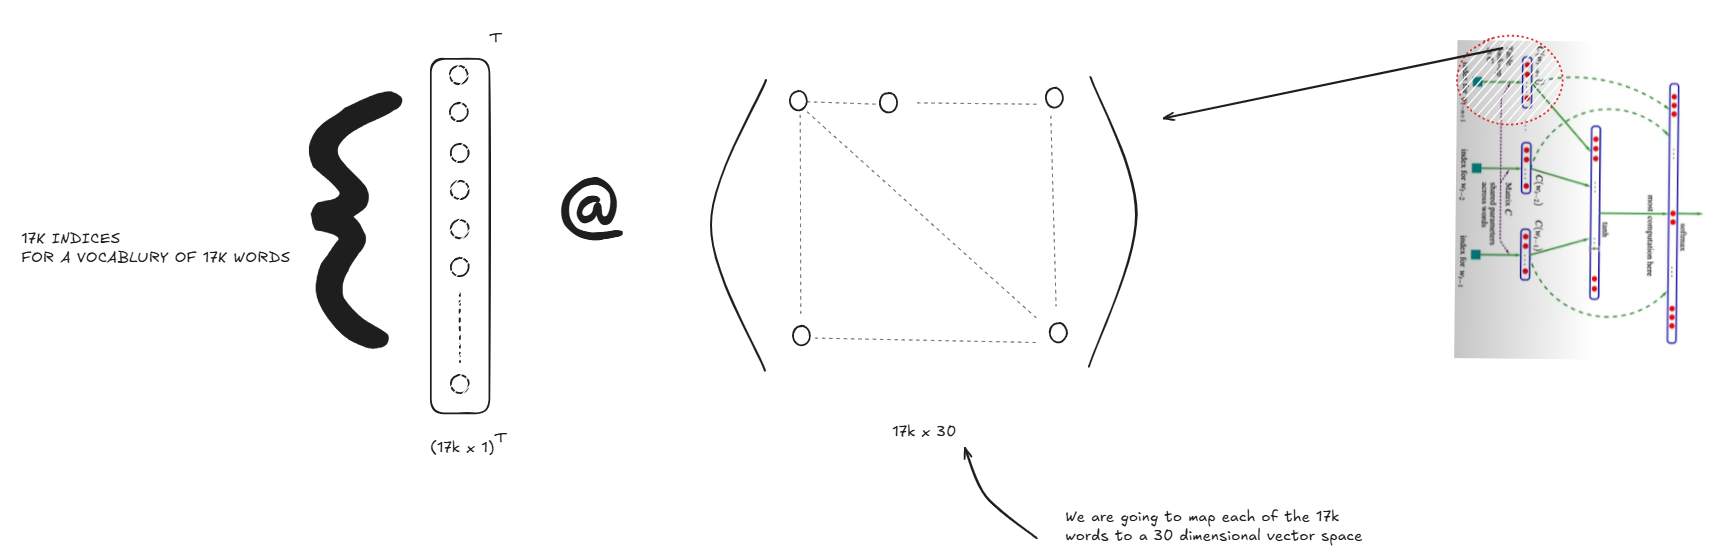

In [93]:
# Build vocablury of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0

itos = {s:i for i, s in stoi.items()}


In [94]:
# Build the dataset

block_size = 3 # context length : how many characters do we take to predict the next one
X, Y = [], [] 

for w in words[:5]:

    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        print(''.join(itos[i] for i in context), '--->', itos[ix])

        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [95]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [96]:
"""C is the lookup to transform each of the 27 characters to a 2 Dimensional vector space"""

C = torch.randn((27, 2))
C

tensor([[-0.1613,  1.5302],
        [-2.3365,  0.4629],
        [-0.7533, -1.2188],
        [-0.3383, -0.2805],
        [-0.4344,  0.8301],
        [-0.8541, -0.7918],
        [-0.1710, -0.3006],
        [ 0.5748, -0.1698],
        [ 0.4241, -1.0707],
        [-0.0841,  0.2582],
        [ 0.0617, -0.3857],
        [-0.1478,  0.4187],
        [-0.8692, -0.2413],
        [ 0.3619, -1.3390],
        [ 0.4039,  0.9255],
        [-0.1930, -1.5771],
        [ 1.1733,  0.5126],
        [-0.4769, -0.7739],
        [ 1.3240, -0.4689],
        [-0.4170, -2.3148],
        [-0.8560,  1.5340],
        [-0.1267,  0.3582],
        [-0.5608,  1.0917],
        [ 1.4623,  0.8900],
        [-0.8706,  0.8019],
        [ 1.2542, -1.0773],
        [-0.5860, -1.6745]])

In [97]:
emb = C[X] # X is 32, 3
emb, emb.shape

(tensor([[[-0.1613,  1.5302],
          [-0.1613,  1.5302],
          [-0.1613,  1.5302]],
 
         [[-0.1613,  1.5302],
          [-0.1613,  1.5302],
          [-0.8541, -0.7918]],
 
         [[-0.1613,  1.5302],
          [-0.8541, -0.7918],
          [ 0.3619, -1.3390]],
 
         [[-0.8541, -0.7918],
          [ 0.3619, -1.3390],
          [ 0.3619, -1.3390]],
 
         [[ 0.3619, -1.3390],
          [ 0.3619, -1.3390],
          [-2.3365,  0.4629]],
 
         [[-0.1613,  1.5302],
          [-0.1613,  1.5302],
          [-0.1613,  1.5302]],
 
         [[-0.1613,  1.5302],
          [-0.1613,  1.5302],
          [-0.1930, -1.5771]],
 
         [[-0.1613,  1.5302],
          [-0.1930, -1.5771],
          [-0.8692, -0.2413]],
 
         [[-0.1930, -1.5771],
          [-0.8692, -0.2413],
          [-0.0841,  0.2582]],
 
         [[-0.8692, -0.2413],
          [-0.0841,  0.2582],
          [-0.5608,  1.0917]],
 
         [[-0.0841,  0.2582],
          [-0.5608,  1.0917],
          

Above, we did this

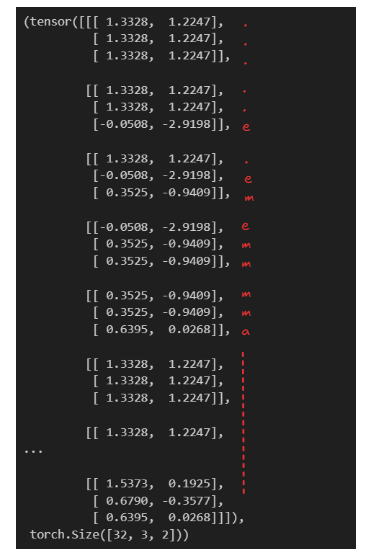

In [98]:
# Construction of the HIDDEN LAYER

"""
We have 6 inputs to the hidden layer because we have 3 embeddings each of 2 Dimensions as input to the hidden layer
"""
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

Visualisation of Hidden Layer Construction

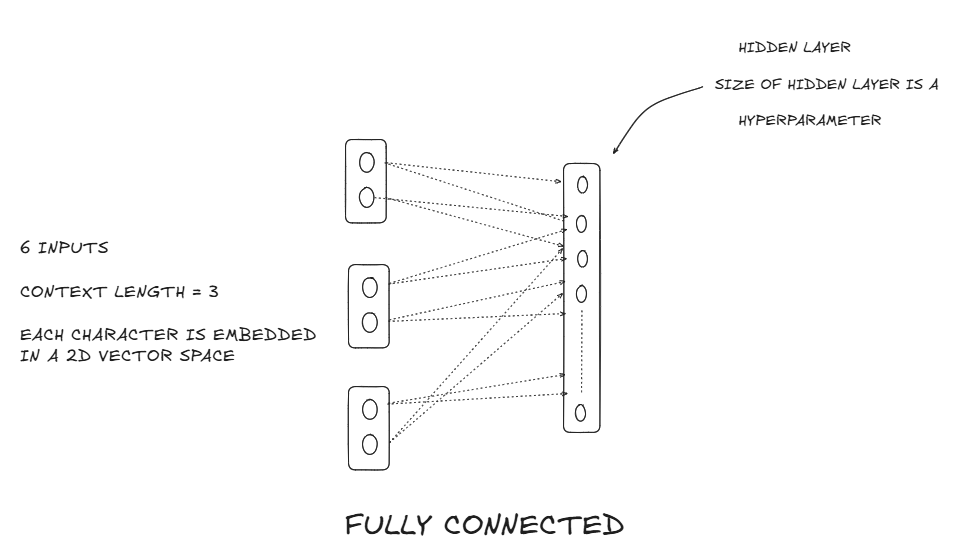

In [99]:
"""
Now, we simply cannot do emb @ W1 + b

Because emb is of dimension [32,3,2]
the hidden layer takes weights from 6 neurons
So we have to stack up the 3 2D vectors to make input neurons  = 6

Therefore we will do emb = emb.view(32, 6)  OR emb.view(32, -1) --> By putting -1, torch predicts the dimension
"""

emb = emb.view(emb.shape[0], -1) # OR ALTERNATIVELY, emb.view(-1, 6)

h = torch.tanh(emb @ W1 + b1)



"""
emb @ W1 ==> (32, 100)
b1       ==> (100)

After Broadcasting,

(32, 100)
(1 , 100)
"""

'\nemb @ W1 ==> (32, 100)\nb1       ==> (100)\n\nAfter Broadcasting,\n\n(32, 100)\n(1 , 100)\n'

In [100]:
# Creation of Final Layer

W2 = torch.randn((100, 27))
b2 = torch.randn(27)

logits = h @ W2 + b2

In [101]:
counts = logits.exp()

In [102]:
probs = counts/ counts.sum(1, keepdims=True)
loss = -probs[torch.arange(32), Y].log().mean()
loss

tensor(20.9096)

# SUMMARY

In [103]:
block_size = 3 # context length : how many characters do we take to predict the next one
X, Y = [], [] 

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

# TRAINING, VALIDATION, TEST SPLITTING
80%, 10%, 10%

80% -> Used to optimise the paramters of the model

10%(validaiton) -> Development of all the hyperparamters of the model

10% -> Testing

In [104]:
# Build the dataset
block_size = 4
def build_dataset(words):
      # Context length: how many characters do we take to predict the next one?
    X, Y = [], []
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]  # Crop and append
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 4]) torch.Size([182625])
torch.Size([22655, 4]) torch.Size([22655])
torch.Size([22866, 4]) torch.Size([22866])


In [105]:
char_embedding_dimension = 10
hidden_layer_size = 250

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,char_embedding_dimension), generator=g)
W1 = torch.randn((block_size * char_embedding_dimension, hidden_layer_size), generator=g)
b1 = torch.randn(hidden_layer_size, generator=g)
W2 = torch.randn((hidden_layer_size, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]

In [106]:
sum(p.nelement() for p in parameters)

17297

In [107]:
for p in parameters:
    p.requires_grad = True

In [108]:
# for _ in range(1000):
#     # Forward Pass
#     emb = C[X]
#     h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
#     logits = h @ W2 + b2
#     loss = F.cross_entropy(logits, Y)

#     print(loss.item())

#     # Backward Pass
#     for p in parameters:
#         p.grad = None

#     loss.backward()

#     for p in parameters:
#         p.data += -0.1 * p.grad



Doing Forward and Backward pass on entire training set takes a lot of time

Instead, We can divide the dataset in mini batches and train on those mini batches

In [109]:
for i in range(200000):
    # Forward Pass
    ix = torch.randint(0, Xtr.shape[0], (32, )) # Creates a list of random numbers between 0 and X.shape[0] . Size of this list is 32
    # ix = torch.randint(0, X.shape[0], (32, )) # Creates a list of random numbers between 0 and X.shape[0] . Size of this list is 32

    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, block_size * char_embedding_dimension) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])


    # Backward Pass
    for p in parameters:
        p.grad = None

    loss.backward()

    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad


print(loss.item()) # This is the loss for the mini batch

1.990439534187317


In [110]:
# Dev/Validations LOSS

emb = C[Xdev]
h = torch.tanh(emb.view(-1, block_size * char_embedding_dimension) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)

loss    # The Bigram loss was 2.45, So we have already surpassed that loss

tensor(2.1964, grad_fn=<NllLossBackward0>)

# Sampling from the Model

In [111]:
g = torch.Generator().manual_seed(2147483647+10)

for _ in range(200):
    out  = []

    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])] # (1 , block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

mora.
mayan.
seel.
nihah.
lorethreleng.
legelichadielin.
shyloen.
edelieananarielle.
malaia.
noshur.
rishianne.
jenie.
jelionnicolanu.
zened.
ruyah.
faehi.
kayshas.
kyla.
halisa.
yansun.
zajolie.
rent.
revis.
jaiet.
pordin.
holoe.
bhegptickoretty.
chhmo.
rylin.
siri.
evon.
walla.
ortanah.
tande.
elana.
zayten.
brairia.
mell.
kephini.
spavin.
damarienna.
alin.
judt.
ived.
jhevarle.
ajay.
paytoongor.
cramii.
jailon.
ellah.
nylon.
jenayinot.
amari.
zybiyana.
jeremical.
maeten.
ama.
coperley.
daib.
emoccanias.
leimettie.
kagoncilana.
caleno.
acokell.
balken.
anmi.
conna.
resanio.
ansa.
asani.
scilynanciend.
elima.
mari.
azalenae.
tegyn.
bento.
luia.
bonty.
railynn.
jeren.
inisha.
tiontoneorie.
meriah.
adylaynlee.
zevan.
geariah.
athjah.
cadi.
beeds.
riy.
nalani.
xeardi.
yumari.
jamarich.
senav.
esylnos.
kegannel.
zheaya.
rtichan.
clesti.
deceneleran.
jiriannah.
mehktor.
dala.
korennliyah.
dara.
shel.
jaxan.
aashyanni.
poella.
gatthia.
ardi.
ded.
desah.
jazarii.
ariltharmalyn.
ja.
elve.
bea